In [1]:
include("../src/utilities.jl");

In [2]:
using PyPlot

In [3]:
data_dir = "../data/fidelity_amplitude/";

In [4]:
t1, state1, params1 = load_state_jld("$(data_dir)state_1_fidelity_amplitude.jld2")
t1_rwa, state1_rwa, params1_rwa = load_state_jld("$(data_dir)state_1_rwa_fidelity_amplitude.jld2")
t2, state2, params2 = load_state_jld("$(data_dir)state_2_fidelity_amplitude.jld2")
t2_rwa, state2_rwa, params2_rwa = load_state_jld("$(data_dir)state_2_rwa_fidelity_amplitude.jld2")
t3, state3, params3 = load_state_jld("$(data_dir)state_3_fidelity_amplitude.jld2");
t3_rwa, state3_rwa, params3_rwa = load_state_jld("$(data_dir)state_3_rwa_fidelity_amplitude.jld2");

In [5]:
state1_m = project_qubit("x_minus", state1);
state1_rwa_m = project_qubit("x_minus", state1_rwa);

In [6]:
state2_m = project_qubit("x_minus", state2);
state2_rwa_m = project_qubit("x_minus", state2_rwa);

In [7]:
state3_m = project_qubit("x_minus", state3);
state3_rwa_m = project_qubit("x_minus", state3_rwa);

In [8]:
t_fid1, fid1 = fidelity_over_time(t1, state1_m, state1_rwa_m);
t_fid2, fid2 = fidelity_over_time(t2, state2_m, state2_rwa_m);
t_fid3, fid3 = fidelity_over_time(t3, state3_m, state3_rwa_m);

In [9]:
t1_scaled = t_fid1.*params1[:sys_params]["g_2"]
t2_scaled = t_fid2.*params2[:sys_params]["g_2"]
t3_scaled = t_fid3.*params3[:sys_params]["g_2"];

In [11]:
frac1 = params1[:sys_params]["A"]/(2.405*params1[:sys_params]["w_d"]/2.0)
frac2 = params2[:sys_params]["A"]/(2.405*params1[:sys_params]["w_d"]/2.0)
frac3 = params3[:sys_params]["A"]/(2.405*params1[:sys_params]["w_d"]/2.0);

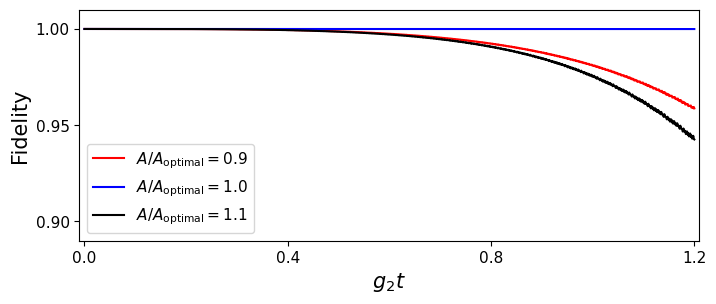

PyObject <matplotlib.legend.Legend object at 0x1a5eddd20>

In [12]:
PyPlot.figure(figsize=(8,3))
PyPlot.plot(t1_scaled, fid1, label=L"A/A_{\text{optimal}} = " * "$(frac1)", color="red")
PyPlot.plot(t2_scaled, fid2, label=L"A/A_{\text{optimal}} = " * "$(frac2)", color="blue")
PyPlot.plot(t3_scaled, fid3, label=L"A/A_{\text{optimal}} = " * "$(frac3)", color="black")
PyPlot.ylim(0.89, 1.01)
PyPlot.xlim(-0.01, 1.21)
PyPlot.xlabel(L"g_2 t", fontsize=15)
PyPlot.ylabel("Fidelity", fontsize=15)
PyPlot.plot(grid=false, framestyle=:box)
PyPlot.xticks(ticks=[0.0, 0.4,  0.8,  1.2], fontsize=11)
PyPlot.yticks(ticks=[0.9, 0.95, 1.0], fontsize=11)
PyPlot.legend(loc="best", fontsize=11)
